## 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

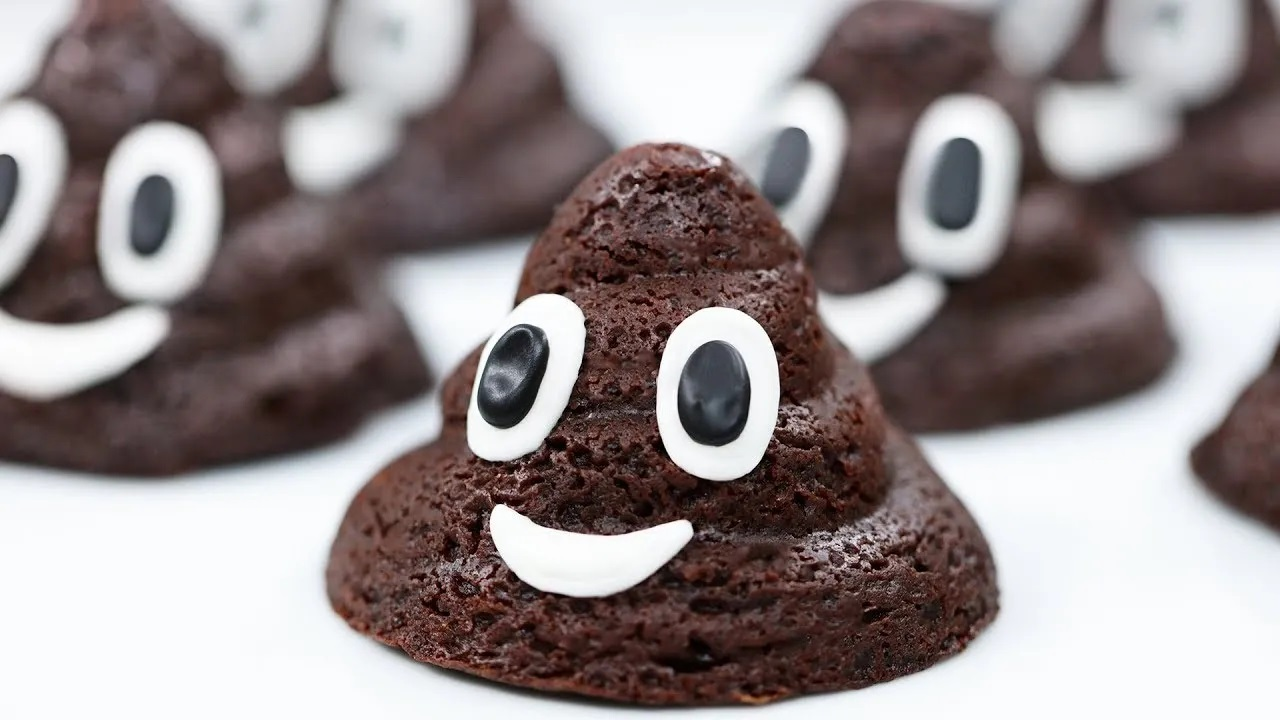

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
Image(filename='pics/chocopoop.jpg', width=600 , height=600 )

### 💾 The data

#### Your team created a file with the following information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

In [ ]:
df=pd.read_csv('data/chocolate_bars.csv')
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [ ]:
display(df.info(), df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2530 entries, 0 to 2529

Data columns (total 11 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   id                2530 non-null   int64  

 1   manufacturer      2530 non-null   object 

 2   company_location  2530 non-null   object 

 3   year_reviewed     2530 non-null   int64  

 4   bean_origin       2530 non-null   object 

 5   bar_name          2530 non-null   object 

 6   cocoa_percent     2530 non-null   float64

 7   num_ingredients   2443 non-null   float64

 8   ingredients       2443 non-null   object 

 9   review            2530 non-null   object 

 10  rating            2530 non-null   float64

dtypes: float64(3), int64(2), object(6)

memory usage: 217.5+ KB


None

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

### 1. What is the average rating by country of origin?

In [ ]:
df_avg = df[['company_location', 'rating']].groupby('company_location').mean()
df_avg.rename(columns = {'rating':'avg. rating'}, inplace = True)

from IPython.display import display_html 

df1_styler = df_avg[:17].style.set_table_attributes("style='display:inline'").set_caption('df1')
df2_styler = df_avg[17:34].style.set_table_attributes("style='display:inline'").set_caption('df2')
df3_styler = df_avg[34:51].style.set_table_attributes("style='display:inline'").set_caption('df3')
df4_styler = df_avg[51:].style.set_table_attributes("style='display:inline'").set_caption('df4')


display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_(), raw=True)

,avg. rating
company_location,
Amsterdam,3.312500
Argentina,3.305556
Australia,3.358491
Austria,3.258333
Belgium,3.103175
Bolivia,3.250000
Brazil,3.280000
Canada,3.303672
Chile,3.750000


### 2. How many bars were reviewed for each of those countries?

In [ ]:
df_count = df[['company_location', 'review']].groupby('company_location').count()
df_count.rename(columns = {'review':'reviews'}, inplace = True)

df1_styler = df_count[:17].style.set_table_attributes("style='display:inline'").set_caption('df1')
df2_styler = df_count[17:34].style.set_table_attributes("style='display:inline'").set_caption('df2')
df3_styler = df_count[34:51].style.set_table_attributes("style='display:inline'").set_caption('df3')
df4_styler = df_count[51:].style.set_table_attributes("style='display:inline'").set_caption('df4')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_(), raw=True)


,reviews
company_location,
Amsterdam,12
Argentina,9
Australia,53
Austria,30
Belgium,63
Bolivia,2
Brazil,25
Canada,177
Chile,2


### 3. Create plots to visualize findings for questions 1 and 2.

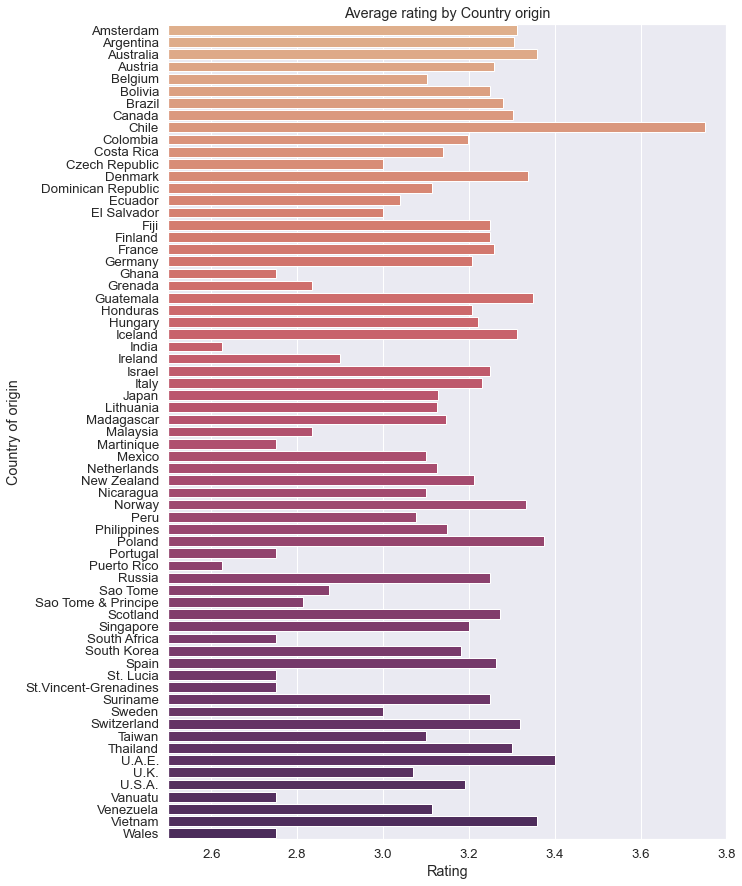

In [ ]:
df_avg = df_avg.reset_index()
sns.set(font_scale=1.2)
ax = plt.subplots(figsize=(10, 15))
ax = sns.barplot(data=df_avg, y='company_location', x='avg. rating', palette='flare')
plt.title('Average rating by Country origin')
plt.xlabel('Rating')
plt.ylabel('Country of origin')
plt.xlim(2.5, 3.8)
plt.show()

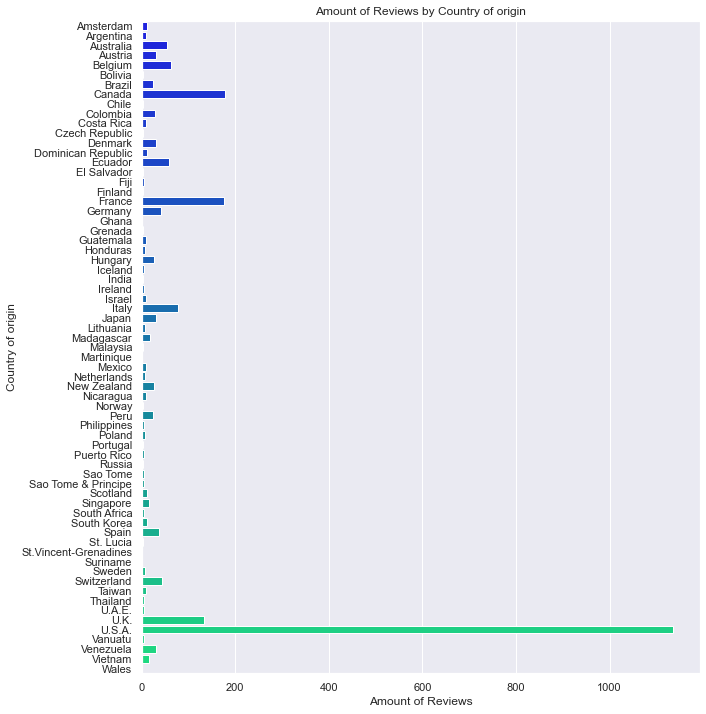

In [ ]:
df_count = df_count.reset_index()
sns.set(font_scale=1.0)
ax = plt.subplots(figsize=(10, 12))
ax = sns.barplot(data=df_count, y='company_location', x='reviews', palette='winter')
plt.title('Amount of Reviews by Country of origin')
plt.xlabel('Amount of Reviews')
plt.ylabel('Country of origin')
plt.show()

### 4. Is the cacao bean's origin an indicator of quality?

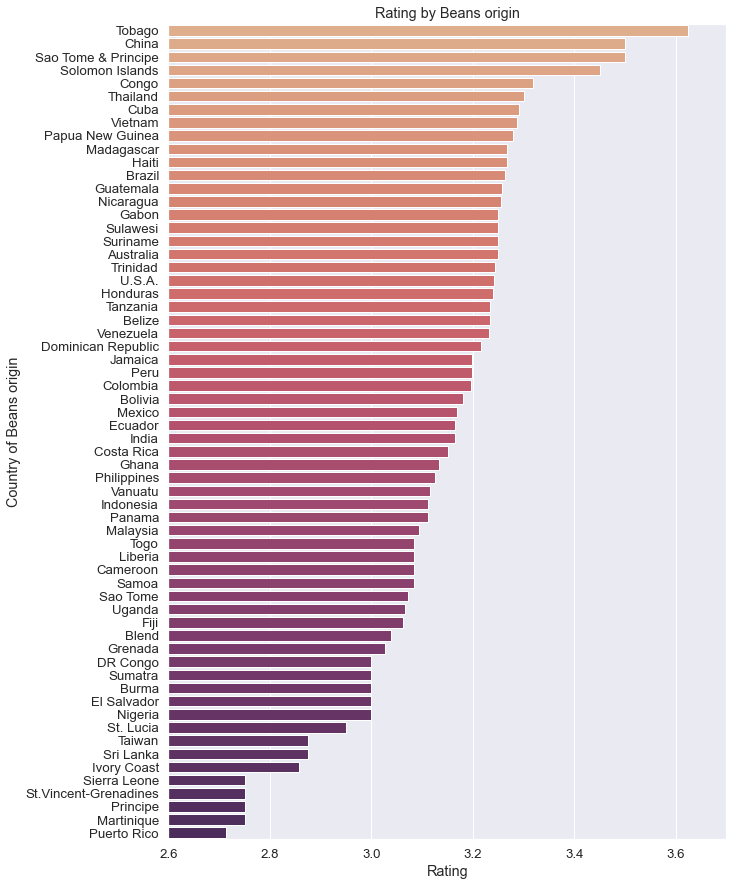

In [ ]:
df_or = df[['bean_origin', 'rating']].groupby('bean_origin').mean().reset_index().sort_values('rating', ascending=False)
sns.set(font_scale=1.2)
ax = plt.subplots(figsize=(10, 15))
ax = sns.barplot(data=df_or, y='bean_origin', x='rating', palette='flare')
plt.title('Rating by Beans origin')
plt.xlabel('Rating')
plt.ylabel('Country of Beans origin')
plt.xlim(2.6, 3.7)
plt.show()

### 5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?


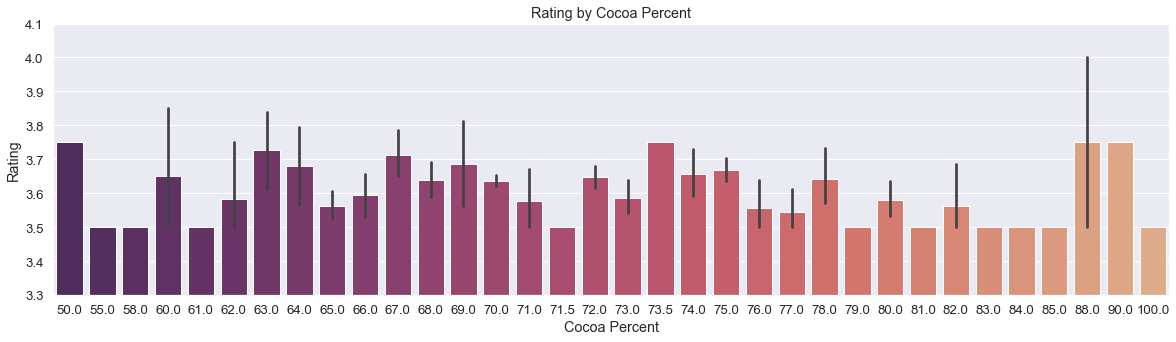

In [ ]:
df_3_5_r = df[df['rating'] >= 3.5]
sns.set(font_scale=1.2)
ax = plt.subplots(figsize=(20, 5))
ax = sns.barplot(data=df_3_5_r, x='cocoa_percent', y='rating', palette='flare_r')
plt.title('Rating by Cocoa Percent')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.ylim(3.3, 4.1)
plt.show()

### 6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).

In [ ]:
df_nona = df.dropna()
df_l = df_nona[df_nona.ingredients.str.contains('L')]
df_nl = df_nona[df_nona.ingredients.str.contains('L') == False]

df_l_avg_total = df_l[['rating']].mean()
df_nl_avg_total = df_nl[['rating']].mean()

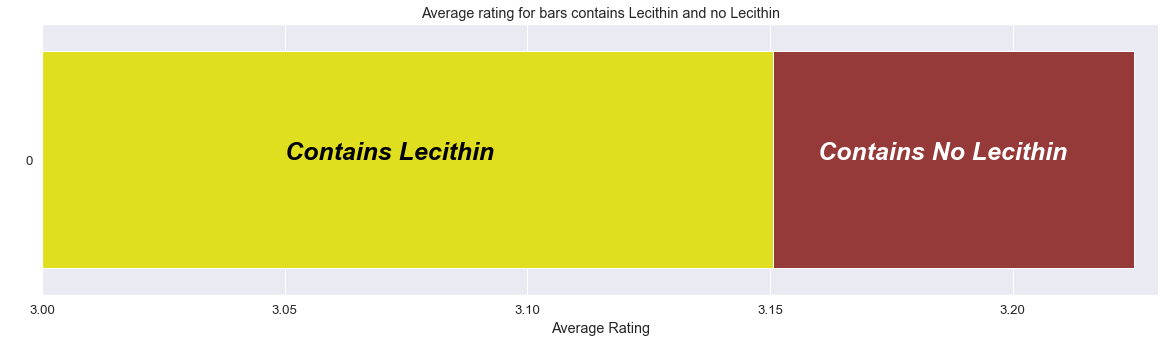

In [ ]:
ax1, ax2 = plt.subplots(figsize=(20, 5))
ax1 = sns.barplot(data=df_nl_avg_total, color='brown', orient='h')
ax2 = sns.barplot(data=df_l_avg_total, color='yellow', orient='h')
plt.title('Average rating for bars contains Lecithin and no Lecithin')
plt.xlabel('Average Rating')
plt.ylabel(' ')
plt.text(3.05, 0, "Contains Lecithin", horizontalalignment='left', size='xx-large', color='black', weight='extra bold', fontstyle='oblique')
plt.text(3.16, 0, "Contains No Lecithin", horizontalalignment='left', size='xx-large', color='white', weight='extra bold', fontstyle='oblique')
plt.xlim(3.0, 3.23)
plt.show()

### 7 Summarize your findings.
Customers review's ratings indicates that they likes more lecithin-less bars with beans origin from Tobago manufactured in Chile.